# **DATA602 Final Project**
Diana Plunkett

## Libraries

Loading the various libraries we will use ...

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

## Data Load

About PLDS: This is a census survey of all public libraries in the US, one file for each of the 5 years 2015 - 2019. Each contains over 9000 observations and 150+ variables. We will narrow both rows and columns to those of interest, plus add a few calculated variables.

When loading each dataframe, we name them with the year: plds19 is the PLDS data from 2019 and so forth.  

In [121]:
#Bring in the 5 data sets
plds19 = pd.read_csv('https://raw.githubusercontent.com/dianaplunkett/607/main/PLS_FY19_AE_pud19i.csv', encoding='latin-1')
plds18 = pd.read_csv('https://raw.githubusercontent.com/dianaplunkett/607/main/pls_fy18_ae_pud18i.csv', encoding='latin-1')
plds17 = pd.read_csv('https://raw.githubusercontent.com/dianaplunkett/607/main/PLS_FY17_AE_pud17i.csv', encoding='latin-1')
plds16 = pd.read_csv('https://raw.githubusercontent.com/dianaplunkett/607/main/PLS_FY2016_AE_pupld16a_updated.csv', encoding='latin-1')
plds15 = pd.read_csv('https://raw.githubusercontent.com/dianaplunkett/607/main/PLS_FY2015_AE_pupld15a.csv', encoding='latin-1')



### A peak at the data...

Looking at the first few rows on one of the files.  All the files are generally the same, with a few small differences in field names.  

Each row represents the responses to the survey from one library system.  Each column is a variable about that library system.

In [122]:
plds19.head()

,STABR,FSCSKEY,LIBID,LIBNAME,ADDRESS,CITY,ZIP,ZIP4,ADDRES_M,CITY_M,...,GNISPLAC,CNTYPOP,LOCALE_ADD,LOCALE_MOD,CENTRACT,CENBLOCK,CDCODE,CBSA,MICROF,GEOMATCH
0,AK,AK0001,AK0001-002,ANCHOR POINT PUBLIC LIBRARY,34020 NORTH FORK ROAD,ANCHOR POINT,99556,M,P.O. BOX 129,ANCHOR POINT,...,03110,58708,43,43,8.00,3007,200,-4,N,A
1,AK,AK0002,AK0002-011,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,6055,3600 DENALI STREET,ANCHORAGE,...,03000,288000,11,11,19.00,3002,200,11260,0,A
2,AK,AK0003,AK0003-002,ANDERSON COMMUNITY LIBRARY,101 FIRST STREET,ANDERSON,99744,M,P.O. BOX 3078,ANDERSON,...,03220,2097,43,43,1.00,1013,200,-4,N,A
3,AK,AK0006,AK0006-002,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,M,P.O. BOX 368,BETHEL,...,06520,18386,33,33,2.00,2004,200,-4,N,A
4,AK,AK0007,AK0007-002,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,M,P.O. BOX 520829,BIG LAKE,...,07070,108317,42,42,5.02,1004,200,11260,0,A


In [123]:
#Keep only rows that for library systems that meet the criteria for Public Libraries
plds19=plds19[plds19['C_FSCS']=='Y']
plds18=plds18[plds18['C_FSCS']=='Y']
plds17=plds17[plds17['C_FSCS']=='Y']
plds16=plds16[plds16['C_FSCS']=='Y']
plds15=plds15[plds15['C_FSCS']=='Y']

## 1. Data Tidying
A little bit of organizing the data prior to looking further.  

### 1.1 Keep only needed fields
For each of the 5 datasets (1 per year), we keep only those fields we might use.  Erring on the side of caution here, as we are not 100% sure what we might need later, so we keep a bit more than we might use in the end.  

In [124]:
# keep only fields of interest in each of the data sets
plds19 = plds19[["STABR", "FSCSKEY", "LIBNAME",
"C_RELATN", "C_LEGBAS", "C_ADMIN",
"GEOCODE", "POPU_UND", "CENTLIB", "BRANLIB",
"BKMOB", "LIBRARIA", "OTHPAID", "LOCGVT", "STGVT",
"FEDGVT", "OTHINCM", "PRMATEXP", "ELMATEXP",
"OTHMATEX", "BKVOL", "EBOOK", "AUDIO_PH",
"AUDIO_DL", "VIDEO_PH", "VIDEO_DL", "HRS_OPEN",
"VISITS", "TOTCIR", "ELMATCIR",  "TOTPRO", "KIDPRO", 
"YAPRO", "TOTATTEN", "KIDATTEN", "YAATTEN", "OBEREG", 
"RSTATUS", "LOCALE_ADD"]]

plds18 = plds18[["STABR", "FSCSKEY", "LIBNAME",
"C_RELATN", "C_LEGBAS", "C_ADMIN",
"GEOCODE", "POPU_UND", "CENTLIB", "BRANLIB",
"BKMOB", "LIBRARIA", "OTHPAID", "LOCGVT", "STGVT",
"FEDGVT", "OTHINCM", "PRMATEXP", "ELMATEXP",
"OTHMATEX", "BKVOL", "EBOOK", "AUDIO_PH",
"AUDIO_DL", "VIDEO_PH", "VIDEO_DL", "HRS_OPEN",
"VISITS", "TOTCIR", "ELMATCIR",  "TOTPRO", "KIDPRO", 
"YAPRO", "TOTATTEN", "KIDATTEN", "YAATTEN", "OBEREG", 
"RSTATUS", "LOCALE_ADD"]]

plds17 = plds17[["STABR", "FSCSKEY", "LIBNAME",
"C_RELATN", "C_LEGBAS", "C_ADMIN",
"GEOCODE", "POPU_UND", "CENTLIB", "BRANLIB",
"BKMOB", "LIBRARIA", "OTHPAID", "LOCGVT", "STGVT",
"FEDGVT", "OTHINCM", "PRMATEXP", "ELMATEXP",
"OTHMATEX", "BKVOL", "EBOOK", "AUDIO_PH",
"AUDIO_DL", "VIDEO_PH", "VIDEO_DL", "HRS_OPEN",
"VISITS", "TOTCIR", "ELMATCIR",  "TOTPRO", "KIDPRO", 
"YAPRO", "TOTATTEN", "KIDATTEN", "YAATTEN", "OBEREG", 
"RSTATUS", "LOCALE_ADD"]]

plds16 = plds16[["STABR", "FSCSKEY", "LIBNAME",
"C_RELATN", "C_LEGBAS", "C_ADMIN",
"GEOCODE", "POPU_UND", "CENTLIB", "BRANLIB",
"BKMOB", "LIBRARIA", "OTHPAID", "LOCGVT", "STGVT",
"FEDGVT", "OTHINCM", "PRMATEXP", "ELMATEXP",
"OTHMATEX", "BKVOL", "EBOOK", "AUDIO_PH",
"AUDIO_DL", "VIDEO_PH", "VIDEO_DL", "HRS_OPEN",
"VISITS", "TOTCIR", "ELMATCIR",  "TOTPRO", "KIDPRO", 
"YAPRO", "TOTATTEN", "KIDATTEN", "YAATTEN", "OBEREG", 
"RSTATUS", "LOCALE"]]

plds15 = plds15[["STABR", "FSCSKEY", "LIBNAME",
"C_RELATN", "C_LEGBAS", "C_ADMIN",
"GEOCODE", "POPU_UND", "CENTLIB", "BRANLIB",
"BKMOB", "LIBRARIA", "OTHPAID", "LOCGVT", "STGVT",
"FEDGVT", "OTHINCM", "PRMATEXP", "ELMATEXP",
"OTHMATEX", "BKVOL", "EBOOK", "AUDIO_PH",
"AUDIO_DL", "VIDEO_PH", "VIDEO_DL", "HRS_OPEN",
"VISITS", "TOTCIR", "ELMATCIR",  "TOTPRO", "KIDPRO", 
"YAPRO", "TOTATTEN", "KIDATTEN", "YAATTEN", "OBEREG", 
"RSTATUS", "LOCALE"]]

### 1.2 Create a Year Column

Later, we ill bring all 5 years into one dataframe.  In order to still be able to identify what year each row represents, we need a column with the year.   

In [125]:
# add a year column to each dataset, so we have that when we put it together
plds19['YEAR'] = '2019'
plds18['YEAR'] = '2018'
plds17['YEAR'] = '2017'
plds16['YEAR'] = '2016'
plds15['YEAR'] = '2015'

### 1.3 Consistant Naming

The LOCALE field is called LOCALE_ADD in some years.  Renaming it to LOCALE so it is consistant across all 5 data sets. 

In [126]:
#make the locale column a consistant name across all data sets
#in 15 & 16 it was called LOCALE, in later years LOCALE_ADD
#change the LOCALE_ADD to LOCALE
plds19.rename(columns = {'LOCALE_ADD':'LOCALE'}, inplace = True)
plds18.rename(columns = {'LOCALE_ADD':'LOCALE'}, inplace = True)
plds17.rename(columns = {'LOCALE_ADD':'LOCALE'}, inplace = True)



### 1.4 Make a single dataframe

Bring all 5 years together into a single dataframe, called plds_all.  

Now the structure of the data is one row per library system per year.  

In [127]:
#concatanate the rows from the datasets into a single df
dfs = [plds19, plds18, plds17, plds16, plds15]
plds_all =pd.concat(dfs)
#check to see that we have rows from all years


### 1.4.a Checking where that leaves us

A peak at the number of rows per year, before any cleaning of rows.  

In [128]:
plds_all['YEAR'].value_counts().sort_index()

2015    9083
2016    9074
2017    9071
2018    9069
2019    9076
Name: YEAR, dtype: int64

### 1.5 Drop rows

In the data, we want to eliminate responses of library systems where the response for a key metric was a value of -3 (closed) or -1 (no response).

First, we create a variable, to_drop, with all the conditions we want to drop.  
- Since these metrics are always positive numbers (there are never -10 visits, for example) we can simple say if the value < 0, drop. 
- Also want to drop those systems that consist of only a bookmobile (eg: CENTLIB<1 AND BRANLIB< 1, where there is less than 1 Central Library and less than one Branch Library).  
- And finally, if Locale is missing, drop those.  

Then use to_drop in the df.drop().

In [129]:
#set to_drop to the index of all rows that have conditions 
#we want to exclude

#for the first 7 conditions, we get rid of -3 (closed) 
#and -1 (no response) as they are the only values <0
to_drop = plds_all[(plds_all['TOTCIR']<0) |
                   (plds_all['VISITS']<0) |
                   (plds_all['TOTPRO']<0) |
                   (plds_all['TOTATTEN']<0) |
                   (plds_all['ELMATCIR']<0)|
                   (plds_all['BKVOL']<0)|
                   (plds_all['EBOOK']<0) |
#also get rid of those that do not have a central lib AND 
#do not have branches (they only have bookmobiles)
                   ((plds_all['CENTLIB']<1) & (plds_all['BRANLIB']<1)) |
#There are 4 rows with LOCALE = M(issing).
                   (plds_all['LOCALE']=='M')
                   ].index

plds_all.drop(to_drop, inplace=True)


### 1.5.a Checking again

Another peak at the number of rows per year after dropping above.  We can see that we have reduced the number of rows (library systems) per year by about 1300, leaving roughly 7700 rows (library systems) per year.  

In [130]:
plds_all['YEAR'].value_counts()

2015    7719
2019    7718
2016    7714
2018    7713
2017    7708
Name: YEAR, dtype: int64

### 1.6 Simplify LOCALE

The LOCALE is a categorical variable that has 12 different posibilities.  We want to simplify this to 4.

The values 11, 12 and 13 represent small, medium and large 'city' locales.  We will simplify this to all be 'city'.

Similarly, the values 21,22,23 = 'suburb', 31,32,33 = 'town' and 41,42,43 = 'rural'.

To simplify, first, we will make the field numberic, so we can then assign each range to a condition.  We also assign the 4 values in an array.  Finally, we create a new column 'LOC_SUM' (Summary locale) and use the conditions to assign the appropriate values.  

In [131]:
plds_all['LOCALE'] = plds_all['LOCALE'].apply(pd.to_numeric)


In [132]:
#create a new column based on LOCALE that is simply
#city, suburb, town, rural (rather than s/m/l within each)
conditions = [
    (plds_all['LOCALE']>10) & (plds_all['LOCALE']<15),
    (plds_all['LOCALE']>20) & (plds_all['LOCALE']<25),
    (plds_all['LOCALE']>30) & (plds_all['LOCALE']<35),
    (plds_all['LOCALE']>40) & (plds_all['LOCALE']<45),
]
values = ['city', 'suburb', 'town', 'rural']

plds_all['LOC_SUM']=np.select(conditions,values)

### 1.6.a Checking...

Taking a peak at the number of row per the new LOC_SUM.

In [133]:
plds_all['LOC_SUM'].value_counts()

rural     16265
town      10446
suburb     9431
city       2430
Name: LOC_SUM, dtype: int64

## 2. Exploring & Wrangling the Data

### 2.1 Describe major metrics

First, a quick look at key metrics using df.describe().

Note the wide range of values for each.  
Also note the formating used to make the numbers more readable (not scientific notation).

In [134]:
plds_all[['VISITS', 'TOTCIR', 'HRS_OPEN', 'TOTPRO']].describe().apply(lambda s: s.apply('{0:,.0f}'.format))

,VISITS,TOTCIR,HRS_OPEN,TOTPRO
count,"38,572","38,572","38,572","38,572"
mean,"148,444","249,481","4,195",604
std,"535,081","1,024,883","8,954","2,292"
min,0,0,0,0
25%,"9,560","12,481","1,768",65
50%,"34,017","41,270","2,417",206
75%,"113,878","142,150","3,191",518
max,"17,617,493","24,607,269","239,275","111,454"


### Using Visuals to Explore

### 2.2 Visit by Population Served Scatterplot
The chart below shows the Visits to a library system per population served with the color used for different locales.  

As would be expected, the Rural and Town locals are clustered in the bottom left, with smaller populations and less visits.  


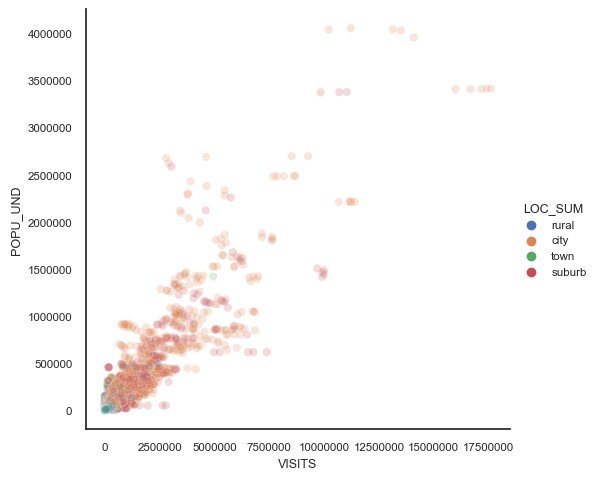

In [135]:
sns.set(font_scale=.75)
sns.set_style("white")

ax = sns.relplot(x='VISITS',
            y='POPU_UND',
            data=plds_all,
            hue= 'LOC_SUM',
            alpha=0.2
            )

plt.ticklabel_format(style='plain', axis='both')

plt.show()

### 2.3 Visit by Population Served Scatterplot

Very similar to the above, but with the correlation highlighted.
(Also experimenting with formatting the visuals.) 

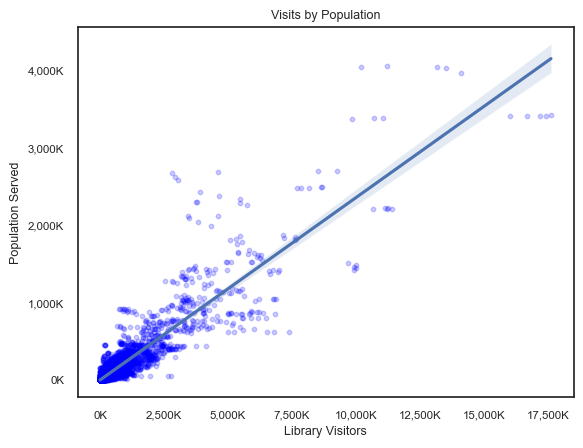

In [136]:
sns.set(font_scale=.75)
sns.set_style("white")

ax = sns.regplot(x='VISITS',
            y='POPU_UND',
            data=plds_all,
            scatter_kws={'color':'blue','alpha':0.2,'s':10}
            )
ax.set_ylabel('Population Served')
ax.set_xlabel('Library Visitors')
plt.ticklabel_format(style='plain', axis='both')

ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(y) + 'K' for y in ax.get_yticks()/1000]
ax.set_yticklabels(ylabels)
ax.set_title('Visits by Population')

plt.show()

### 2.4 Visit by Population in a Facet by Locale

In order to make it easier to see those locales with smaller populations, we can seperate those out using a facet grid.

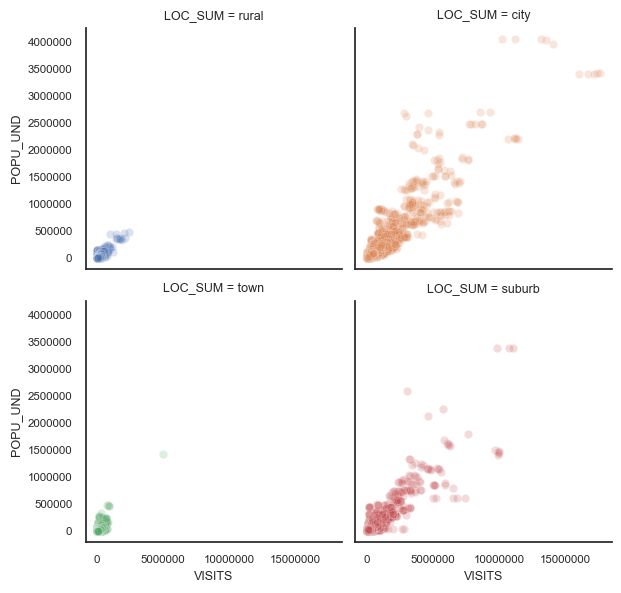

In [137]:

g = sns.FacetGrid(plds_all, 
                  col="LOC_SUM", 
                  hue="LOC_SUM",
                  col_wrap=2)
g.map(sns.scatterplot, "VISITS", "POPU_UND", alpha=.2)

plt.ticklabel_format(style='plain', axis='both')


### 2.5 Visit Histogram

Did the above before getting to assignment on plotly.express so let's play with that a bit.

If we look at all the library systems, visits is so skewed you can barely see it hugging the y axis, with a few outliers dotting the x axis.  

In [138]:
fig = px.histogram(plds_all, x="VISITS")
fig.show()

### 2.6 Narrow Focus to Libraries in Cities

First, create a new dataframe with a subset of rows where locale is city.

In [139]:
#let's look at only city
plds_city = plds_all.loc[plds_all['LOC_SUM']=='city']
plds_city.head()

,STABR,FSCSKEY,LIBNAME,C_RELATN,C_LEGBAS,C_ADMIN,GEOCODE,POPU_UND,CENTLIB,BRANLIB,...,KIDPRO,YAPRO,TOTATTEN,KIDATTEN,YAATTEN,OBEREG,RSTATUS,LOCALE,YEAR,LOC_SUM
1,AK,AK0002,ANCHORAGE PUBLIC LIBRARY,NO,CO,MO,MA1,295365,1,4,...,1320,347,61226,44545,3458,8,1,11,2019,city
15,AK,AK0023,FAIRBANKS NORTH STAR BOROUGH PUBLIC LIBRARIES,NO,CO,MO,CO1,97121,1,1,...,609,55,23138,19003,1065,8,1,13,2019,city
97,AL,AL0019,OXFORD PUBLIC LIBRARY,ME,CI,SO,CI1,21180,1,0,...,638,8,7366,5064,8,5,2,13,2019,city
125,AL,AL0052,AUBURN PUBLIC LIBRARY,ME,CI,SO,CI1,63973,1,0,...,897,57,28230,27246,725,5,1,13,2019,city
126,AL,AL0053,OPELIKA - LEWIS COOPER JR. MEMORIAL LIBRARY,ME,CI,SO,CI1,30240,1,0,...,333,34,8586,7623,231,5,1,13,2019,city


### 2.6.a Checking 

Then take a look again at the Visits histogram, this time with just visits from library systems that serve cities.  

It is an improvement, but still quite skewed.  

In [140]:
fig = px.histogram(plds_city, x="VISITS")
fig.show()

### 2.7 Narrow Further to Big Cities

Since we are interested in learning we can use at Brooklyn Public Library, let's narrow the focus further, and look at library systems that serve cities with populations over 1M.  

The result is still skewed, with a tail of outliers.  But it is a much more cohesive and relevant dataset.  

In [141]:
plds_big_city = plds_city.loc[plds_city['POPU_UND']>1000000]
fig = px.histogram(plds_big_city, x="VISITS", nbins =40)
fig.show()

### 2.7.a How Many Library Systems
Taking a look at how many library systems per year are now in the set we are working with.

15 - 25, depending on the year. This is now a very small dataset. but let's see what we can do with it.  

In [142]:
plds_big_city['YEAR'].value_counts().sort_index()

2015    15
2016    22
2017    24
2018    25
2019    25
Name: YEAR, dtype: int64

### 2.7.b And which are they..

Checking which library systems are 'big city', and which are there all 5 years, and which are less.  

In [143]:
plds_big_city['LIBNAME'].value_counts()

BROOKLYN PUBLIC LIBRARY                           5
NEW YORK PUBLIC LIBRARY, THE BRANCH LIBRARIES     5
SACRAMENTO PUBLIC LIBRARY                         5
CHARLOTTE MECKLENBURG LIBRARY                     5
DALLAS PUBLIC LIBRARY                             5
SAN DIEGO PUBLIC LIBRARY                          5
SAN JOSE PUBLIC LIBRARY                           5
FREE LIBRARY OF PHILADELPHIA                      5
QUEENS BOROUGH PUBLIC LIBRARY                     5
LOS ANGELES PUBLIC LIBRARY                        5
HILLSBOROUGH COUNTY PUBLIC LIBRARY COOPERATIVE    5
SAN ANTONIO PUBLIC LIBRARY                        5
ATLANTA FULTON PUBLIC LIBRARY SYSTEM              4
HARRIS COUNTY PUBLIC LIBRARY                      4
HAWAII STATE PUBLIC LIBRARY SYSTEM                4
MIAMI-DADE PUBLIC LIBRARY SYSTEM                  4
SAN BERNARDINO COUNTY LIBRARY                     4
ORANGE COUNTY PUBLIC LIBRARIES                    4
BROWARD COUNTY LIBRARIES DIVISION                 4
PHOENIX PUBL

### 2.8 Visit Per Capita Histogram

If, instead of looking at pure Visits, we look at the visits per capita, we get something that is almost close to normal.  

In [144]:
plds_big_city['VISITS_PER_CAP'] = plds_big_city['VISITS']/plds_big_city['POPU_UND']

fig = px.histogram(plds_big_city, x="VISITS_PER_CAP", nbins=40)
fig.show()

### 2.9 Pairplot to see what correlates to Visits

Casting a wide net to see where we might look next.

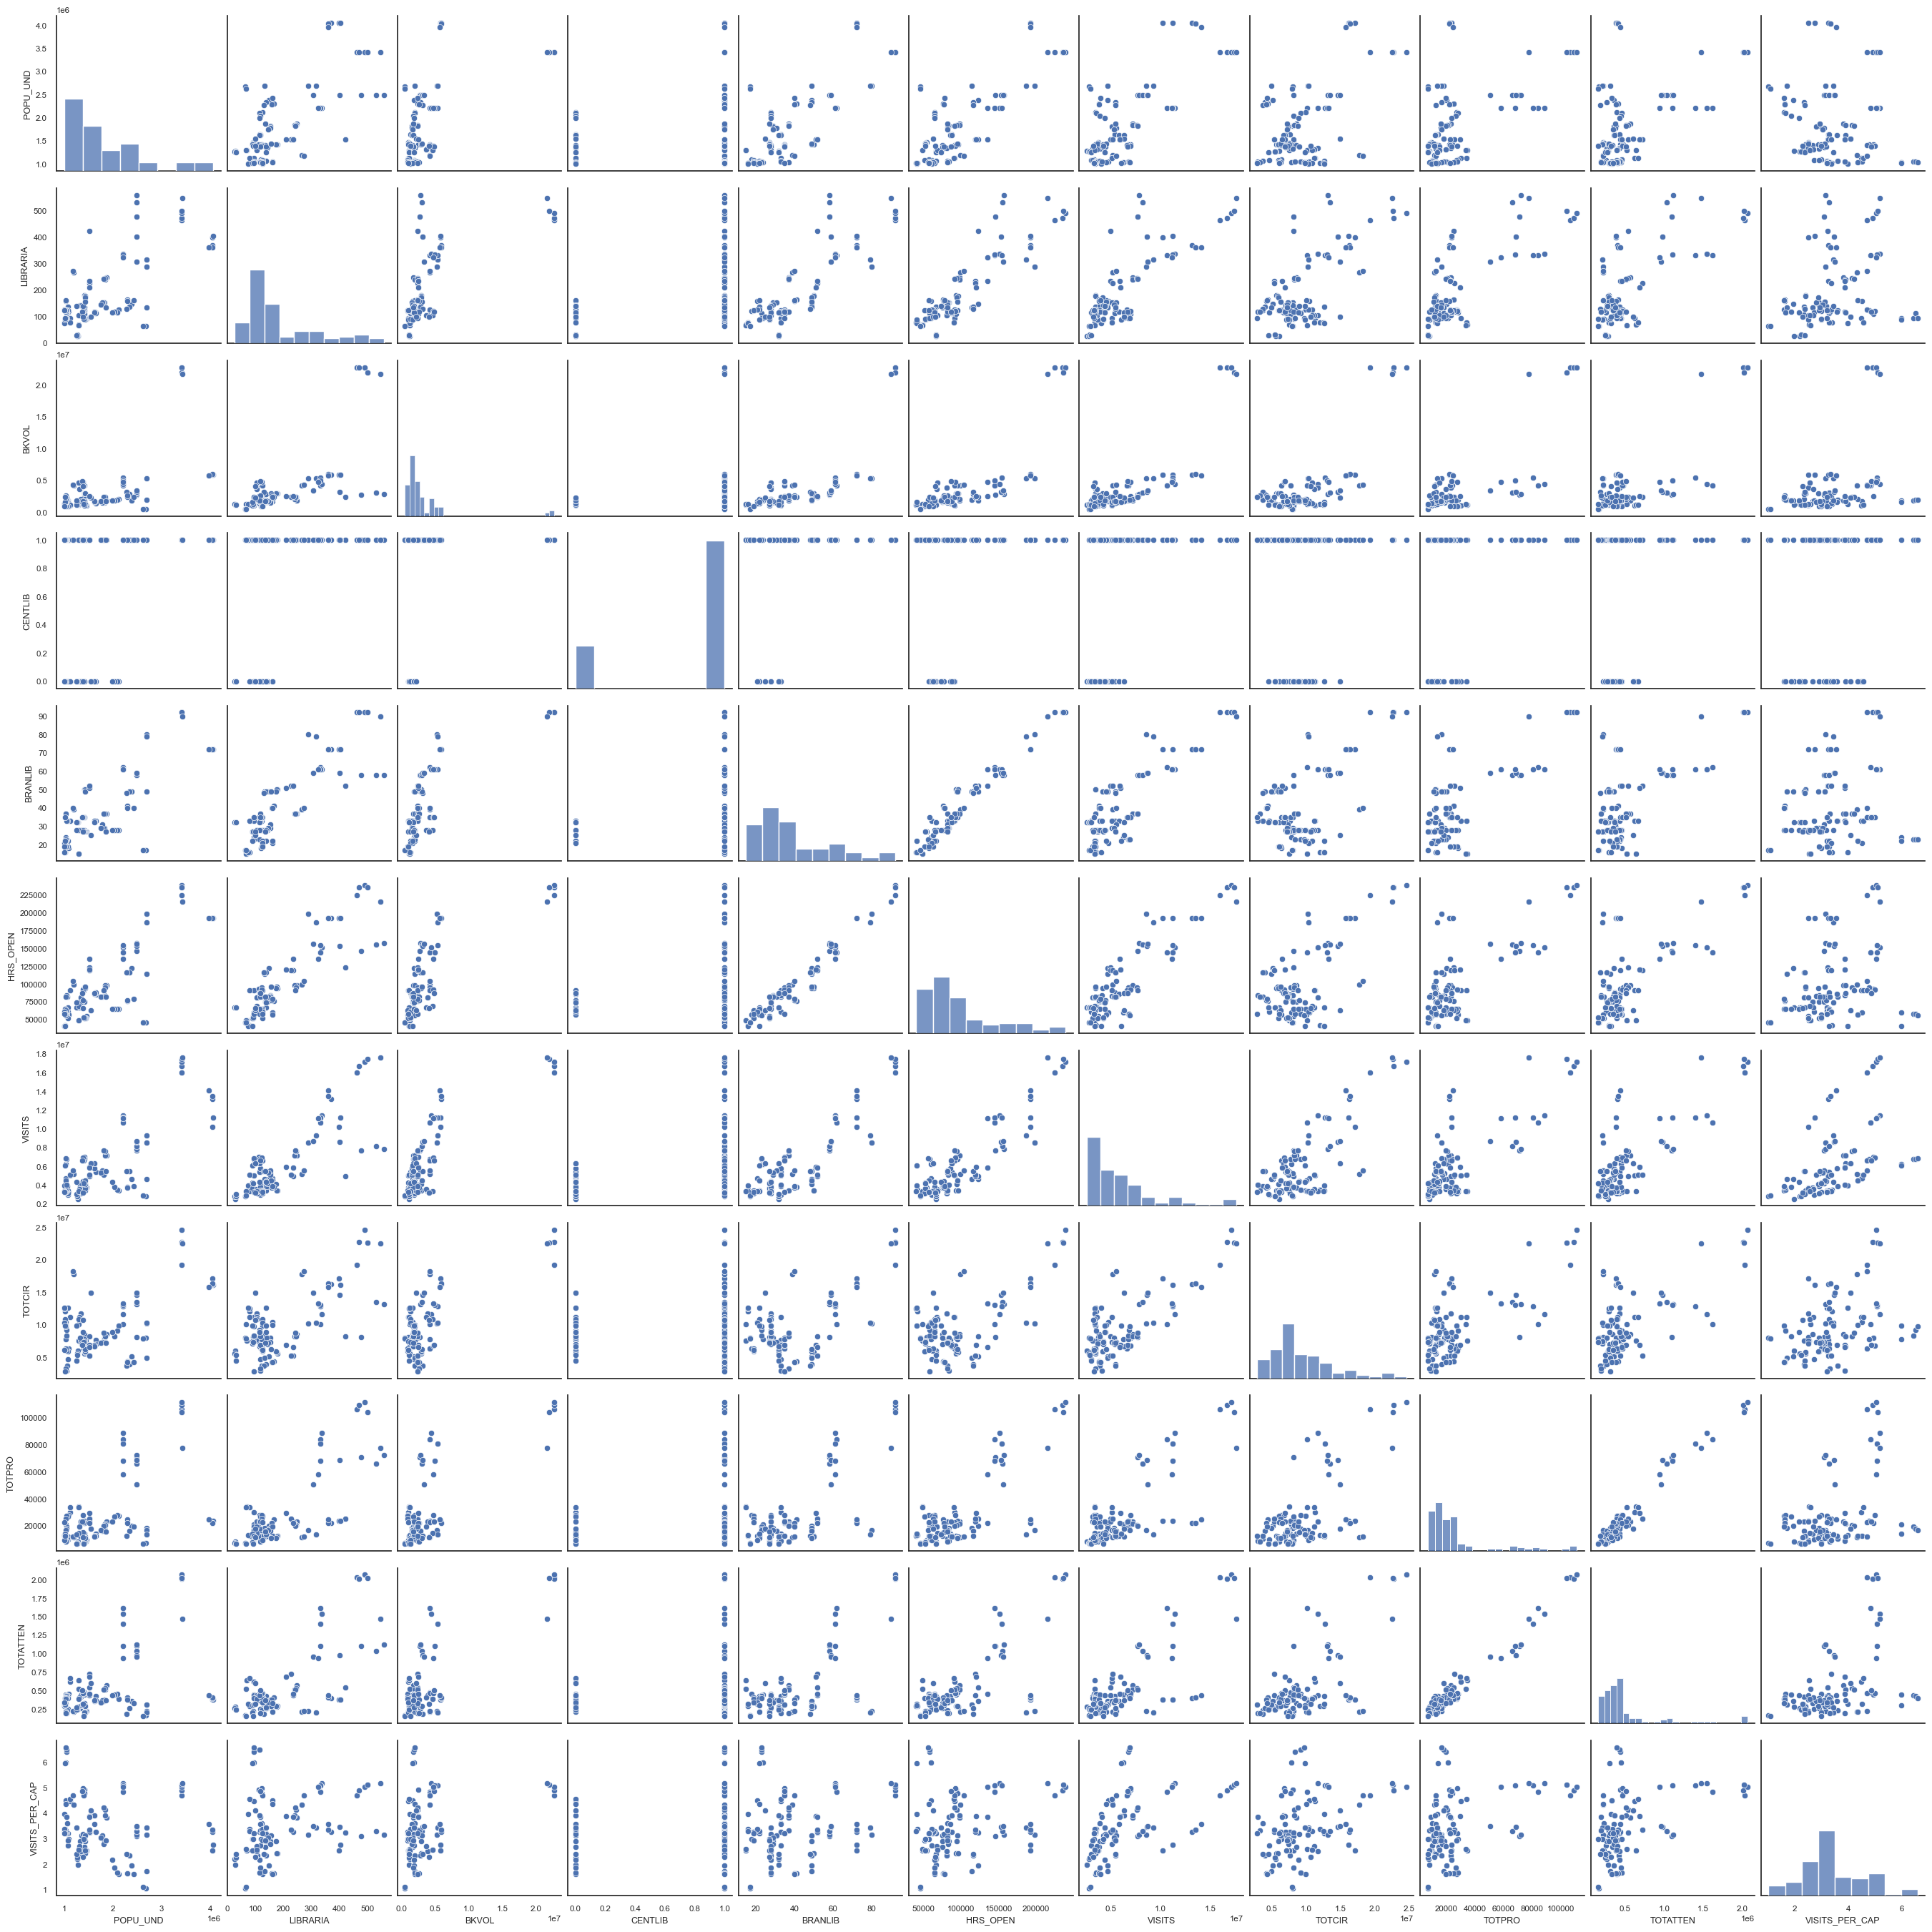

In [145]:
sns.pairplot(data=plds_big_city[['STABR','LIBNAME','POPU_UND','LIBRARIA','BKVOL',
               'CENTLIB','BRANLIB','HRS_OPEN', 'VISITS', 'TOTCIR',
               'TOTPRO','TOTATTEN', 'VISITS_PER_CAP']])

### 2.10 More Focused Pairplot

Taking a look at a few promising metrics:
- Number of Librarians employed
- Number of Branch Libraries
- Hours Open
- Visits
- Total Circ

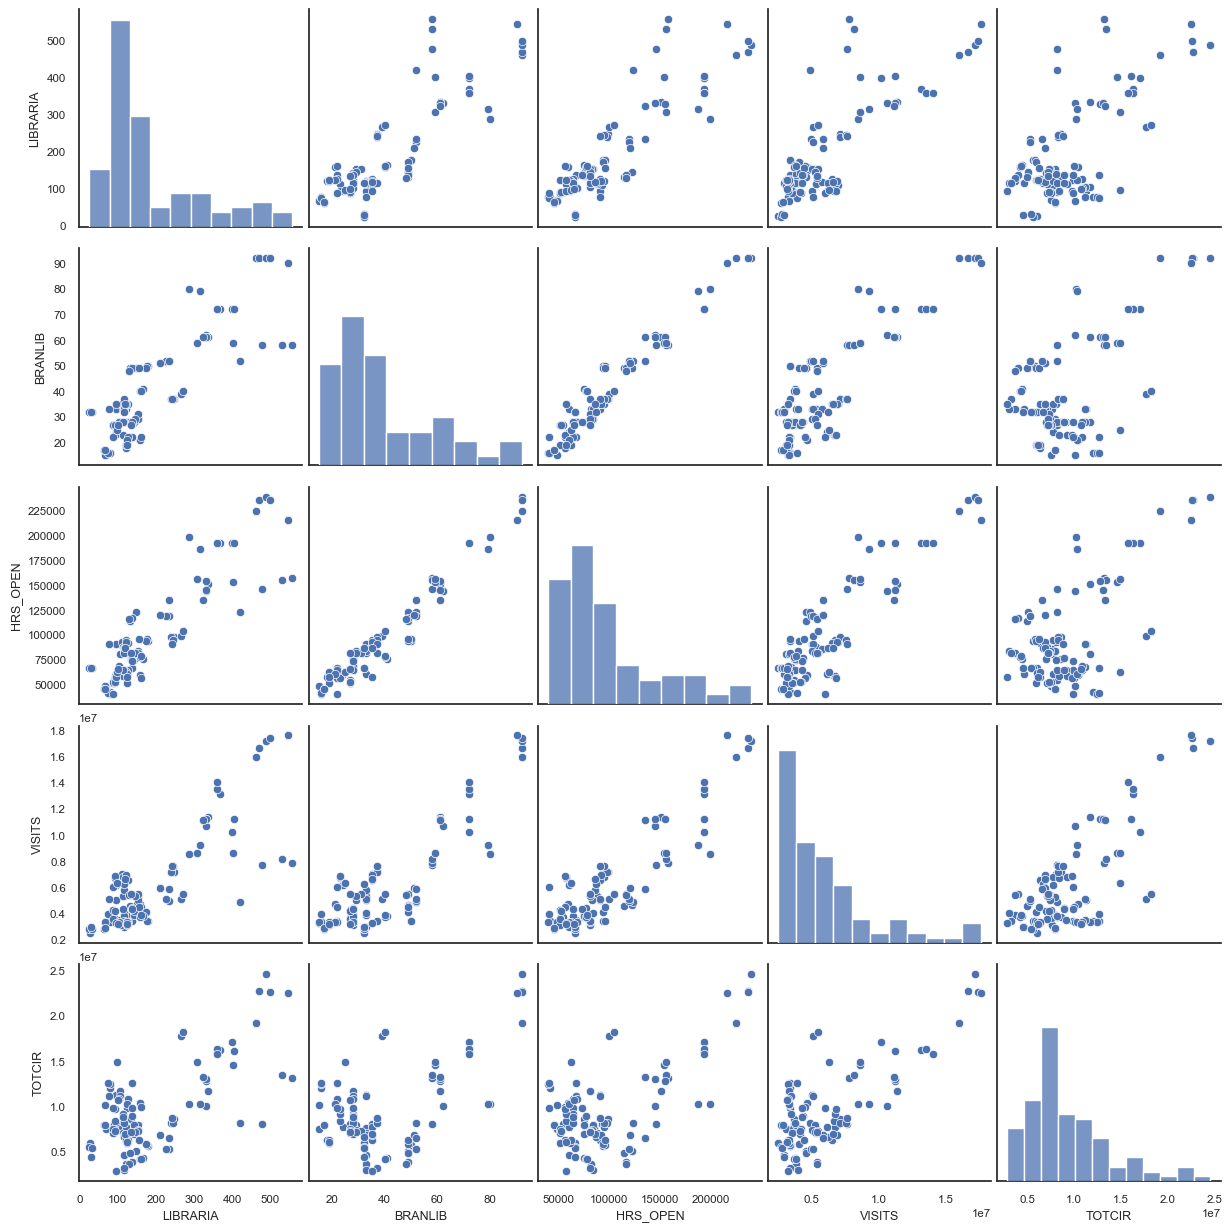

In [146]:
sns.pairplot(
    data=plds_big_city[['LIBRARIA',
                        'BRANLIB',
                        'HRS_OPEN', 
                        'VISITS', 
                        'TOTCIR',]])

### 2.11 Branches... 

After looking at the above, I realized that there is likely a range of how many branches a library has, and related to that, the total annual hours open.

First, let's see how the number of branches varies: 

In [147]:
fig = px.histogram(plds_big_city, x="BRANLIB", nbins=50)
fig.show()

### 2.11.a ...and Hours Open

And similarly, the variety of hours open.

In [148]:
fig = px.histogram(plds_big_city, x="HRS_OPEN", nbins=50)
fig.show()

### 2.11.b Just Checking

I wanted to make sure I understood what hours open represented, so I took a look at hours open per branch for all the systems.  Most systems have between 2200 and 3000 hours, which if we divide by 52 (weeks in a year) we get 42 - 58 hours per week.  Which is reasonable.  The hours open is therefore a cumulative number, adding hours open for each branch for the whole year.  

In [149]:
plds_big_city['HRS_PER_BRAN']=plds_big_city['HRS_OPEN']/plds_big_city['BRANLIB']
fig = px.histogram(plds_big_city, x="HRS_PER_BRAN", nbins=50)
fig.show()

In [150]:
plds_big_city[['HRS_PER_BRAN']].describe().apply(lambda s: s.apply('{0:,.2f}'.format))

,HRS_PER_BRAN
count,111.00
mean,"2,503.69"
std,338.80
min,"1,645.06"
25%,"2,329.50"
50%,"2,546.67"
75%,"2,680.96"
max,"3,293.47"


### 2.12 Physical vs Digital Circ

Also at this point realized that Circulation is made up of Physical and Digital Circ - actual physical books, and eBooks (+ eAudio).  Since the relationship between visits and physical books is clear (one must walk into the branch to get the books), looking at how Vists and Digital Circ is going to be more interesting.  

We have in the data the Total Circulation and the Digital Circulation (e-circ), so we can calculate the Physcial.  

And take a look at how the metrics compare.  Physical Circ is larger than Digtal Circ, making up the major portion of Total Circulation. 

In [151]:
plds_big_city['PHYS_CIRC']= plds_big_city['TOTCIR']-plds_big_city['ELMATCIR']

plds_big_city[['TOTCIR', 'PHYS_CIRC', 'ELMATCIR']].describe().apply(lambda s: s.apply('{0:,.0f}'.format))
           

,TOTCIR,PHYS_CIRC,ELMATCIR
count,111,111,111
mean,"9,382,718","7,697,372","1,685,346"
std,"4,438,660","3,545,867","1,525,312"
min,"2,855,142","2,586,437","97,108"
25%,"6,419,000","5,504,702","699,349"
50%,"8,119,888","6,691,613","1,102,435"
75%,"11,149,058","9,249,874","2,120,348"
max,"24,607,269","20,197,597","8,001,528"


### 2.13 Calculating Metrics per Branch per Hour

Now let's take Vists and Digital Circ, and calculate the per hour per branch amount.  

Using histograms to see the resulting distribution, we see both are still skewed, ecirc per branch per hour even more so than visits per branch per hour.  

Similarly we can see this using describe().  

In [152]:
plds_big_city['vst_hr_br']=(plds_big_city['VISITS']/plds_big_city['BRANLIB'])/plds_big_city['HRS_OPEN']
plds_big_city['ecirc_hr_br']=(plds_big_city['ELMATCIR']/plds_big_city['BRANLIB'])/plds_big_city['HRS_OPEN']


fig = px.histogram(plds_big_city, x="vst_hr_br", nbins =40)
fig.show()

In [153]:
fig = px.histogram(plds_big_city, x="ecirc_hr_br", nbins =40)
fig.show()

In [154]:
plds_big_city[['vst_hr_br', 'ecirc_hr_br']].describe().apply(lambda s: s.apply('{0:,.2f}'.format))


,vst_hr_br,ecirc_hr_br
count,111.00,111.00
mean,2.03,0.74
std,1.29,1.15
min,0.54,0.03
25%,0.98,0.16
50%,1.80,0.42
75%,2.38,0.78
max,6.78,6.81


### 2.14 Scatterplot of the Digital Circ & Visits 
### Both per Branch Per Hour

Now that we have landed on the metrics to use, lets so how they look plotted together. 

Suprisingly, there does seem to be some corralation. 

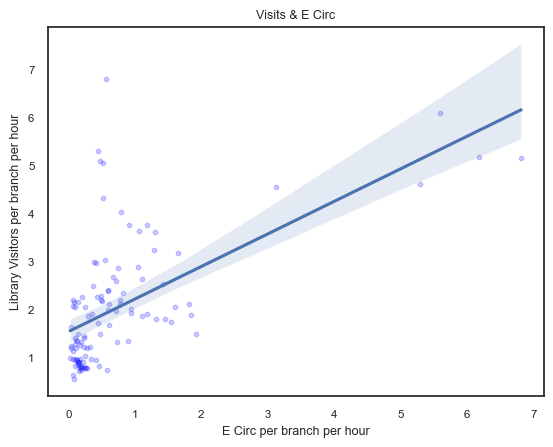

In [155]:
sns.set(font_scale=.75)
sns.set_style("white")

ax = sns.regplot(x='ecirc_hr_br',
            y='vst_hr_br',
            data=plds_big_city,
            scatter_kws={'color':'blue','alpha':0.2,'s':10}
            )
ax.set_ylabel('Library Visitors per branch per hour')
ax.set_xlabel('E Circ per branch per hour')
plt.ticklabel_format(style='plain', axis='both')

ax.set_title('Visits & E Circ')

plt.show()


## 3. Modeling

### 3.1 Shape and fit to a Linear Regression Model

Let's take a look at how strong a corralation there is. 

First we shape the data into 2 arrays (x & y) for input into the linear regression model.

Then we create the model and fit it.

In [156]:
x=np.array(plds_big_city['ecirc_hr_br']).reshape((-1,1))
y=np.array(plds_big_city['vst_hr_br'])

In [157]:
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)


### 3.2 Results

The results of the linear regression:        
*Keep in mind that visits and digital circ are per hour per branch.*
- R squared = .36, so this is a very poor model.  Lesson learned: when I plotted it using sns.regplot, and saw the line, it looked like there was a correlation.  But no.  It was attempting to make the best fit, but the best fit was poor.  


In [158]:
print(f"R Squared: {r_sq}") #r^2
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_}")

R Squared: 0.3625609809533036
Intercept: 1.5310250726124917
Slope: [0.67777287]


## 4. Pivot

OK, so that did not work out.  Tried a bunch of other things that I left in the Appendix, but settled on using Population Served and Visits.  Not a revalation that Visits can be predicted with Population Served, but it is a good way to demonstrated training, testing and use of Kfold for Cross validation.

Also note that we switched back to using the plds_city dataframe - using all those library systems with the locale of city.  

Taking a look at Visits in plds_city, we see the minimum value is 0.

In [159]:
plds_city[['VISITS', 'POPU_UND']].describe().apply(lambda s: s.apply('{0:,.0f}'.format))

,VISITS,POPU_UND
count,"2,430","2,430"
mean,"986,678","253,122"
std,"1,573,468","415,387"
min,0,19
25%,"261,893","69,632"
50%,"471,701","119,224"
75%,"993,936","240,458"
max,"17,617,493","4,054,400"


### 4.1 Check back on data

Therefore we will remove those rows where visits are 0.
And show describe() again, just to check.  Looking at the count, we can see there was only one row dropped.  

In [160]:
plds_city= plds_city[plds_city['VISITS'] !=0]
plds_city[['VISITS', 'POPU_UND']].describe().apply(lambda s: s.apply('{0:,.0f}'.format))


,VISITS,POPU_UND
count,"2,429","2,429"
mean,"987,084","253,203"
std,"1,573,665","415,453"
min,"1,487",19
25%,"262,073","69,657"
50%,"473,702","119,224"
75%,"993,940","240,487"
max,"17,617,493","4,054,400"


### 4.2 Shape data for Train & Test


In [161]:

X=np.array(plds_city['POPU_UND']).reshape((-1,1))
y=np.array(plds_city['VISITS'])

### 4.3 Split the data into Training and Testing Sets

In [162]:
# Split the data into training/testing sets
from sklearn import linear_model
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = tts(X, y, 
                                       test_size=0.20,
                                       random_state=88)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)


### 4.4 Look at the results

Ok, R Squared of .74, much better.

In [163]:
# Results
print("Coefficient:", regr.coef_)
print("R Squared: %.2f" % r2_score(y_test, y_pred))


Coefficient: [3.56410979]
R Squared: 0.74


### 4.5 Plot

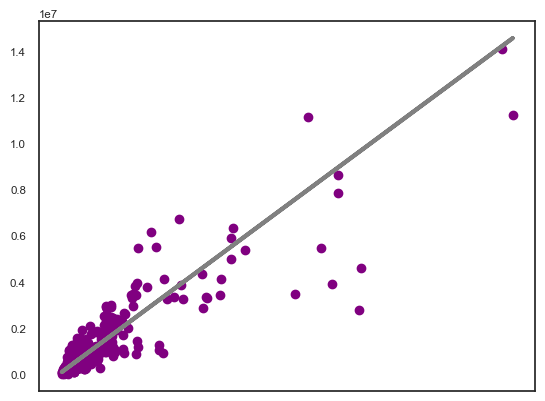

In [164]:
# Plot outputs
plt.scatter(X_test, y_test, color="purple")
plt.plot(X_test, y_pred, color="grey", linewidth=3)

plt.xticks(())

plt.show()


### 4.6 Cross Validation with Kfold

Results are consistantly good, some even better then what we got above.  

In [165]:
kf = KFold(n_splits=6, shuffle=True, random_state=44)

cv_results = cross_val_score(regr, X, y, cv=kf)
print(cv_results)
print(np.mean(cv_results), np.std(cv_results))
print(np.quantile(cv_results, [0.025, 0.975]))

[0.75325818 0.83620733 0.83515821 0.75982235 0.82154735 0.79660154]
0.8004324935658603 0.0337165321794003
[0.7540787  0.83607619]


## 5. Conclusion

Just because you can plot a line over some points does not mean there is really a relationship.  
Digital Circ does not correlate to visits.

But Population Served does.

Sometimes you have to go with the less interesting, but true story.  

## Appendix
Some other stuff I tried that did not yield meaningful results.

### Linear Regression with the log of Digital Circ
Just checking to see if taking the log of the skewed ecirc makes a difference.     
It did not, so left this out.  Keeping it here to show my work. 

In [166]:
#what if we took the log of ecirc per hour?
plds_big_city['log_ecirc_hr_br']=np.log(plds_big_city['ecirc_hr_br'])

fig = px.histogram(plds_big_city, x="log_ecirc_hr_br", nbins =40)
fig.show()

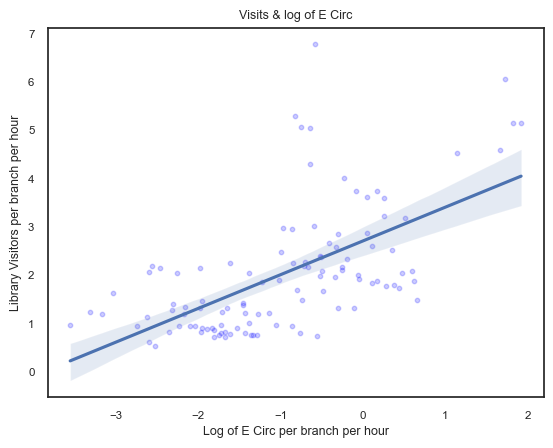

In [167]:
sns.set(font_scale=.75)
sns.set_style("white")

ax = sns.regplot(x='log_ecirc_hr_br',
            y='vst_hr_br',
            data=plds_big_city,
            scatter_kws={'color':'blue','alpha':0.2,'s':10}
            )
ax.set_ylabel('Library Visitors per branch per hour')
ax.set_xlabel('Log of E Circ per branch per hour')
plt.ticklabel_format(style='plain', axis='both')

ax.set_title('Visits & log of E Circ')

plt.show()

In [168]:
#repeat model with log
# now we need to shape the data into 2 arrays for input into the linear regression model

xlog=np.array(plds_big_city['log_ecirc_hr_br']).reshape((-1,1))
ylog=np.array(plds_big_city['vst_hr_br'])

In [169]:
#create the model and fit it
model_log = LinearRegression().fit(xlog, ylog)
r_sq_log = model_log.score(xlog, ylog)
#get results
print(f"coefficient of determination: {r_sq_log}") #r^2
print(f"intercept: {model_log.intercept_}")        # b0
print(f"slope: {model_log.coef_}")  

coefficient of determination: 0.3772931237808016
intercept: 2.7119551666921837
slope: [0.69911424]


### Another Try: RANSAC Regression

R squared is even worsem (.32), but plotting the outliers was interesting.  

(And a side note, if I did the RANSAC Regression with the log of ecirc, the r sqared was .222)

In [170]:
#trying RANSAC Regression
X=np.array(plds_big_city['ecirc_hr_br']).reshape((-1,1))
y=np.array(plds_big_city['vst_hr_br']).reshape((-1,1))

ransac = RANSACRegressor(base_estimator=LinearRegression(),
                         random_state=42,
                         residual_threshold=2)

ransac.fit(X, y)
predict=ransac.predict(X)
r2=r2_score(y,predict)

print('r2:')
print (r2)

r2:
0.3163211185989403


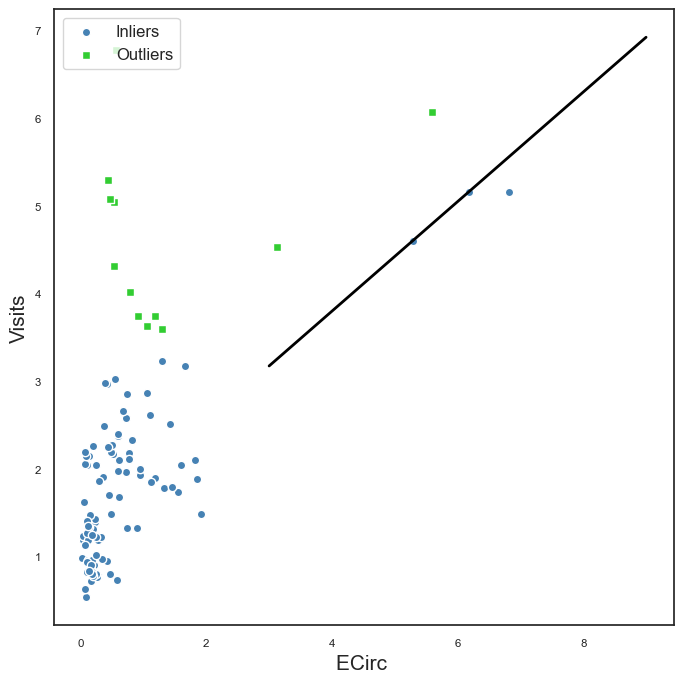

In [171]:
#Get the Inlier mask; Create outlier mask

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Create scatter plot for inlier datset
plt.figure(figsize=(8, 8))
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')

# Create scatter plot for outlier datset
plt.scatter(X[outlier_mask], y[outlier_mask],
             c='limegreen', edgecolor='white',
             marker='s', label='Outliers')

# Draw the best fit line
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('ECirc ', fontsize=15)
plt.ylabel('Visits', fontsize=15)
plt.legend(loc='upper left', fontsize=12)
plt.show()